In [158]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, plot, iplot
import sqlite3
import Code.Preparation as prep
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [123]:
# WorldDf = pd.read_csv('Data/WorldDf.csv')
HappyDf = pd.read_csv('Data/CleanedHappy.csv')
RateDf = pd.read_csv(prep.path('sucide.csv'))
WorldDf = pd.read_csv('Data/WorldDf.csv')

In [124]:
RateDf = RateDf.groupby(['country','year']).mean()

In [81]:

# data = [ dict(
#         type = 'choropleth',
#         locations = RateDf['suicides/100k pop'].index,
#         locationmode = 'country names',
#         z = RateDf['suicides/100k pop'].values,
#         colorscale=
#             [[0.0, "rgb(251, 237, 235)"],
#             [0.09, "rgb(245, 211, 206)"], 
#             [0.12, "rgb(239, 179, 171)"],
#             [0.15, "rgb(236, 148, 136)"],
#             [0.22, "rgb(239, 117, 100)"],
#             [0.35, "rgb(235, 90, 70)"],
#             [0.45, "rgb(207, 81, 61)"],
#             [0.65, "rgb(176, 70, 50)"],
#             [0.85, "rgb(147, 59, 39)"],
#             [1.00, "rgb(110, 47, 26)"]],
#         autocolorscale = False,
#         reversescale = False,
#         marker = dict(
#             line = dict (
#                 color = 'rgb(180,180,180)', 
#                 width = 0.5
#             ) 
#         ),
#         colorbar = dict(
#             autotick = True,
#             tickprefix = '',
#             title = 'Participant'),
#       ) ]

# layout = dict(
#     title = "Urban National Poverty Line Gap %",
#     geo = dict(
#         showframe = False,
#         showcoastlines = True,
#         projection = dict(type = 'Mercator'),
#         width=500,height=400)
# )

# w_map = dict( data=data, layout=layout)
# iplot( w_map, validate=False)

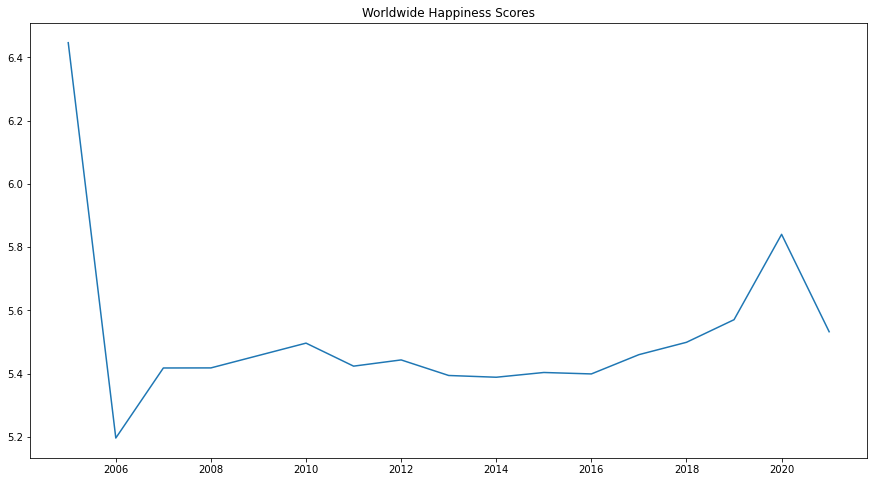

In [82]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(HappyDf.groupby('year').mean()['Life Ladder'])
plt.title('Worldwide Happiness Scores');

### Happiness Scores

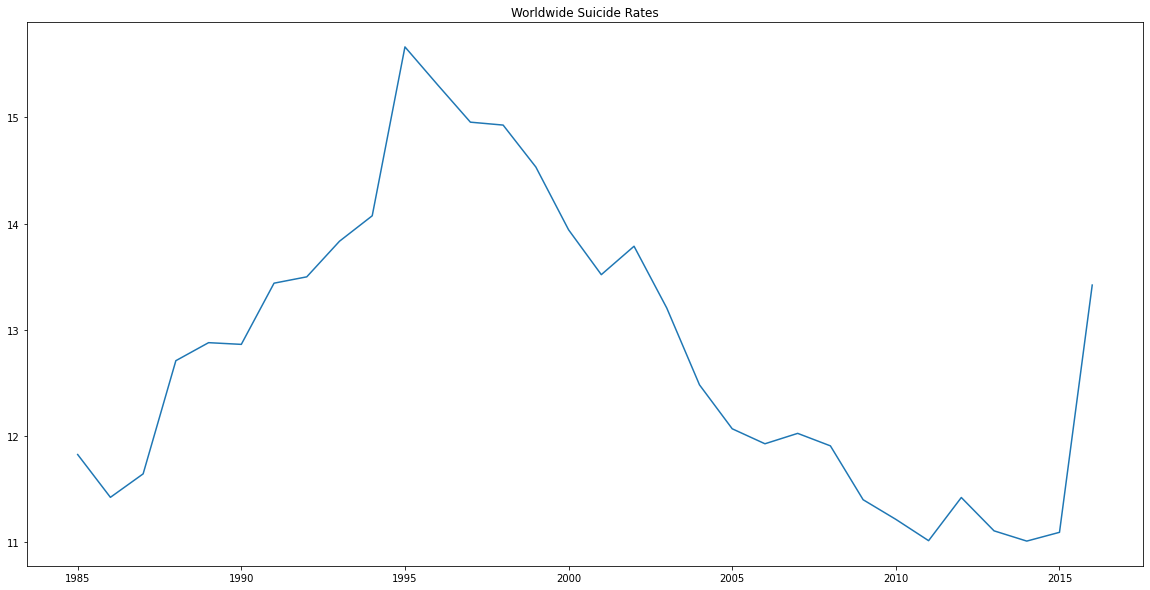

In [83]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(RateDf.groupby('year').mean()['suicides/100k pop'])
plt.title('Worldwide Suicide Rates');

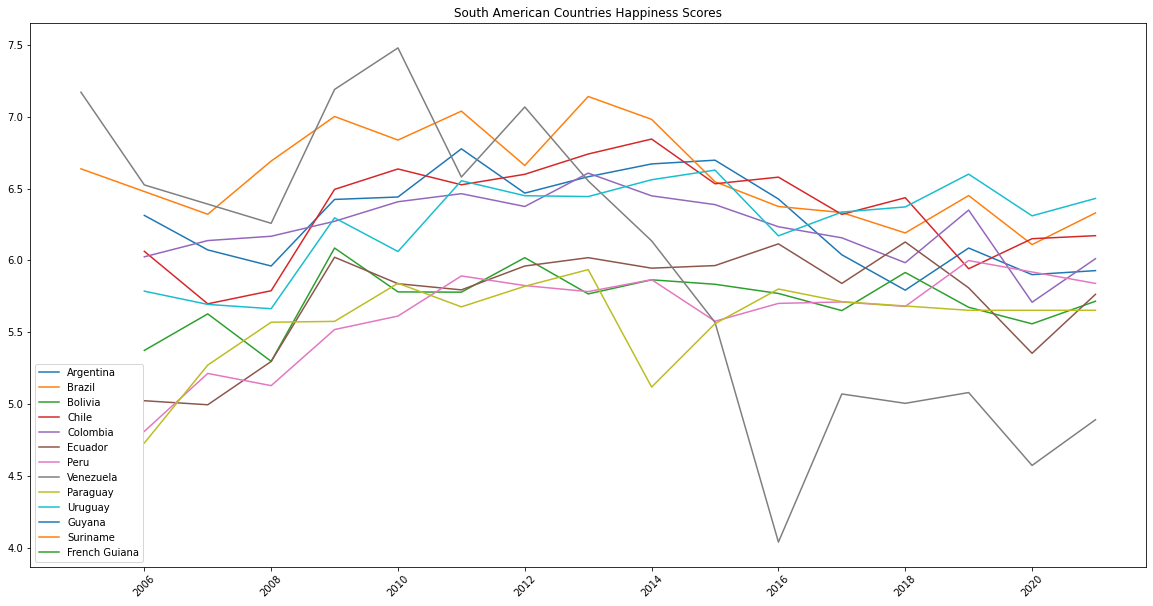

In [84]:
prep.plot_happy_S(HappyDf)
plt.title('South American Countries Happiness Scores');

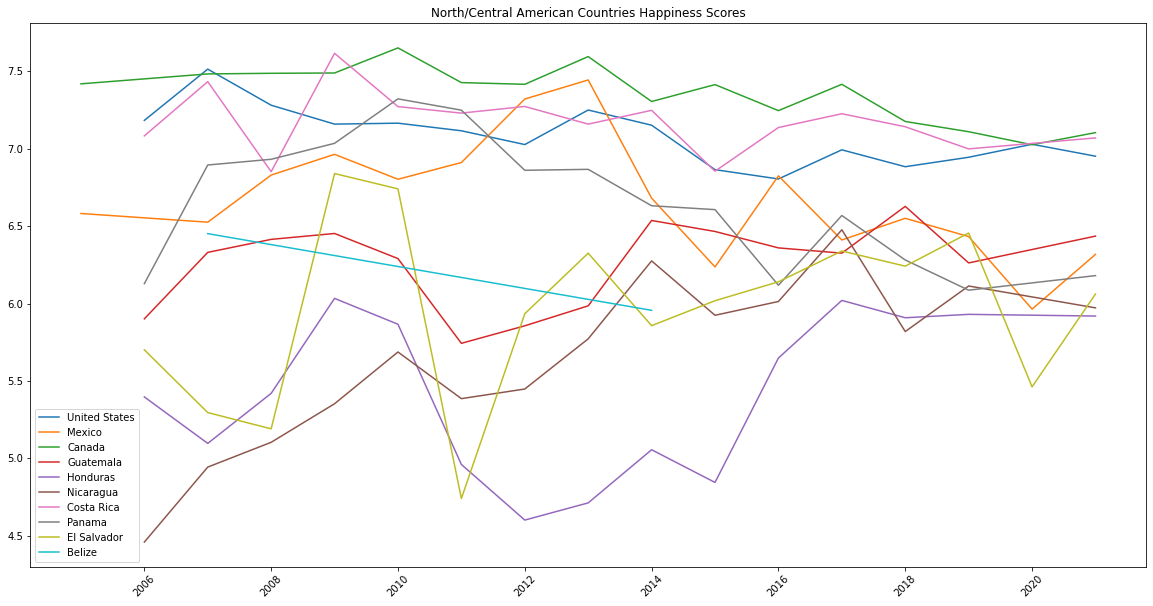

In [154]:
prep.plot_happy_N(HappyDf)
plt.title("North/Central American Countries Happiness Scores");

Text(0.5, 1.0, 'South American Countries Suicide Rates')

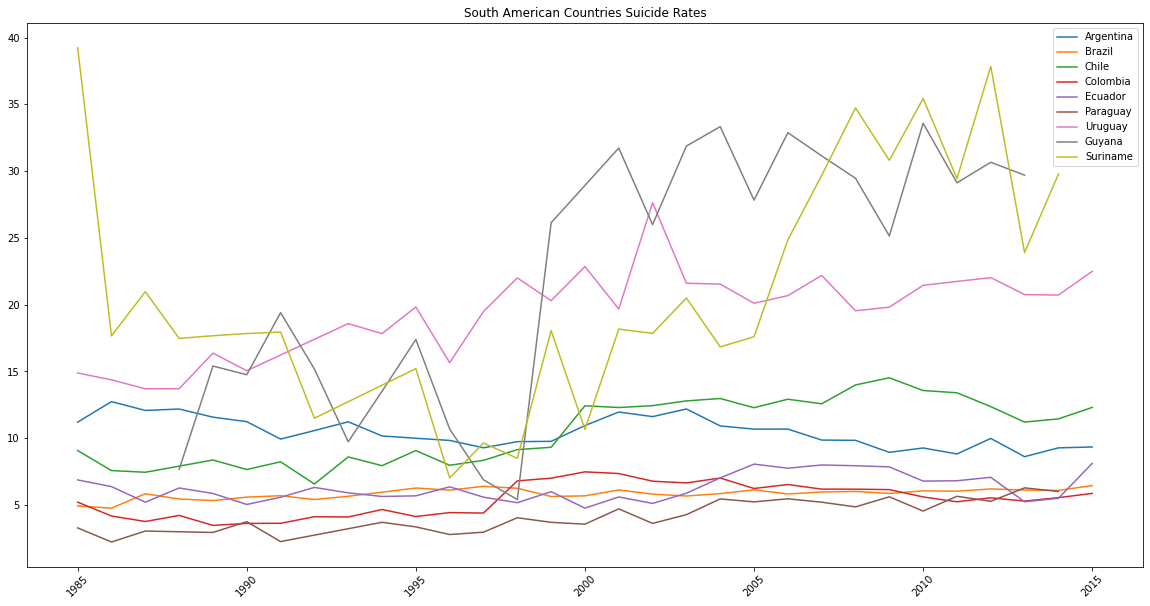

In [86]:
prep.plot_rate_S(RateDf)
plt.title('South American Countries Suicide Rates')

* North/Central American Countries

Text(0.5, 1.0, 'North/Central American Countries Suicide Rates')

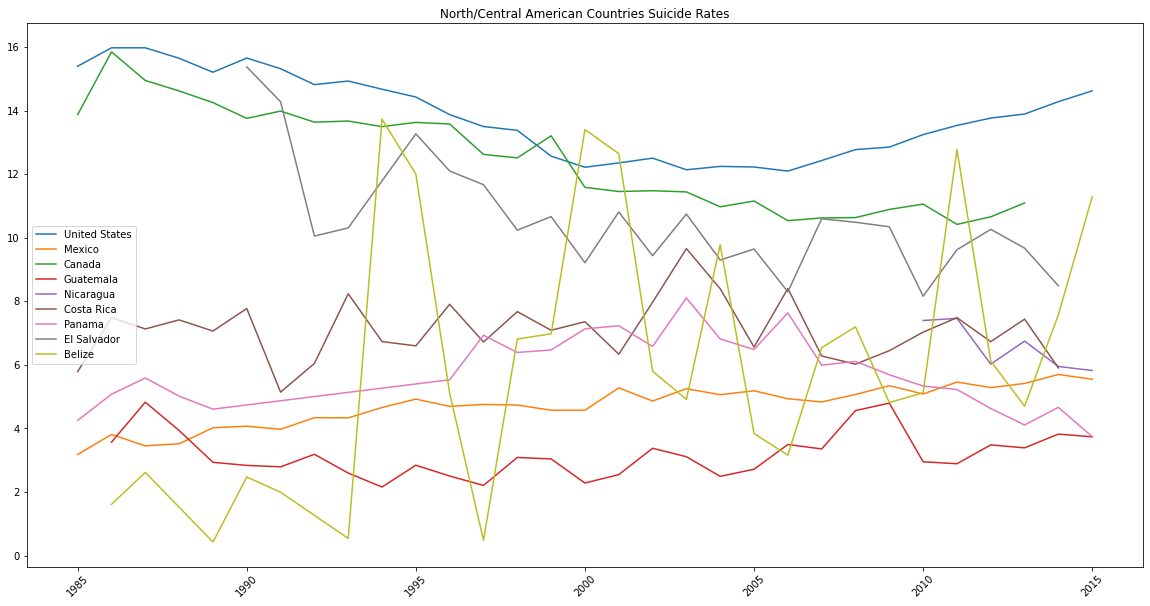

In [87]:
prep.plot_rate_N(RateDf)
plt.title("North/Central American Countries Suicide Rates")

In [190]:
WorldDf.IndicatorName.value_counts()[0:50]

Surface area (sq. km)                                            8815
Land area (sq. km)                                               8815
Population, total                                                8647
Population growth (annual %)                                     8643
Rural population (% of total population)                         8597
Urban population (% of total)                                    8597
Urban population                                                 8581
Rural population                                                 8581
Urban population growth (annual %)                               8578
Population density (people per sq. km of land area)              8560
Primary education, duration (years)                              8508
Secondary education, duration (years)                            8418
Rural population growth (annual %)                               8299
Fixed telephone subscriptions                                    8287
Fixed telephone subs

### EDA by Country

In [109]:
# RateDf.reset_index(inplace=True)
# RateDf['year'] = pd.to_datetime(RateDf['year'].astype(str))
# RateDf = RateDf.groupby(['country','year']).mean()
# HappyDf['year'] = pd.to_datetime(HappyDf['year'])

In [132]:
Arg_R = RateDf.loc['Argentina']['suicides/100k pop']
Arg_W = WorldDf[WorldDf.Country == 'Argentina'].set_index('Year')
Arg_debt = Arg_W[Arg_W.IndicatorName == 'Multilateral debt (% of total external debt)']['Value']
Arg_HDI = RateDf.loc['Argentina']['HDI for year']*100
Arg_gdp = RateDf.loc['Argentina']['gdp_per_capita ($)']/100
Arg_life = Arg_W[Arg_W.IndicatorName == 'Life expectancy at birth, total (years)']['Value']
Arg_H = HappyDf[HappyDf['Country name'] == 'Argentina'].set_index('year')['Life Ladder']*10

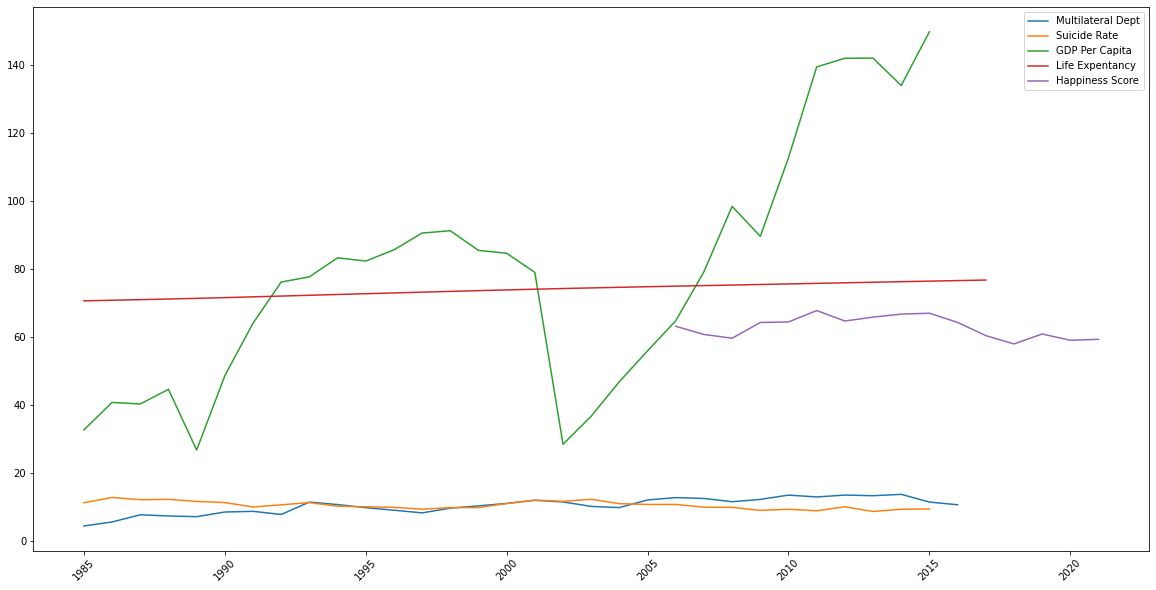

In [133]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(Arg_debt.sort_index(), label='Multilateral Dept')
ax.plot(Arg_R.sort_index(), label='Suicide Rate')
ax.plot(Arg_gdp.sort_index(), label='GDP Per Capita')
ax.plot(Arg_life.sort_index(), label='Life Expentancy')
ax.plot(Arg_H.sort_index(), label='Happiness Score')
plt.xticks(rotation = 45)
plt.legend();

In [135]:
def stationarity_check(TS):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    roll_mean = TS.rolling(window=8, center=False).mean()
    roll_std = TS.rolling(window=8, center=False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS)
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    plt.plot(TS, color='blue',label='Original')
    plt.plot(roll_mean, color='red', label='Rolling Mean')
    plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None

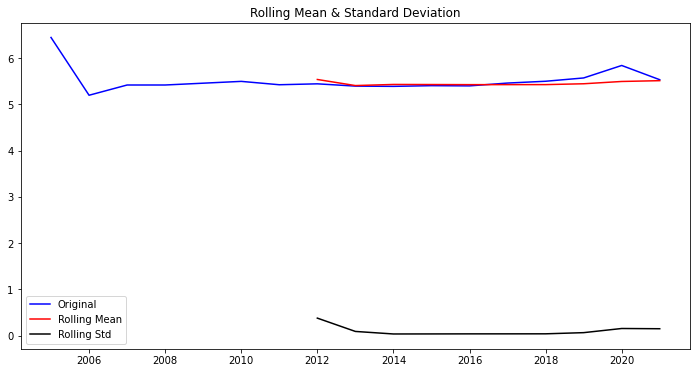

Results of Dickey-Fuller Test: 

Test Statistic                 -0.667773
p-value                         0.854922
#Lags Used                      5.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64


In [137]:
worldhappy = HappyDf.groupby('year').mean()['Life Ladder']
stationarity_check(worldhappy)

In [138]:
naive = worldhappy.shift(1)
naive

year
2005         NaN
2006    6.446259
2007    5.196899
2008    5.418275
2009    5.418509
2010    5.457667
2011    5.496806
2012    5.424082
2013    5.443754
2014    5.394562
2015    5.389021
2016    5.404035
2017    5.399479
2018    5.460408
2019    5.499444
2020    5.570868
2021    5.840600
Name: Life Ladder, dtype: float64

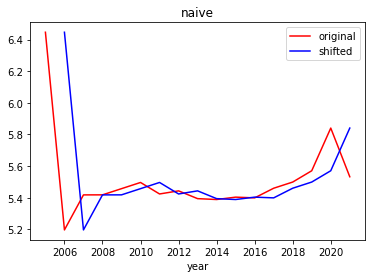

In [139]:
fig, ax = plt.subplots()

worldhappy.plot(ax=ax, c='r', label='original')
naive.plot(ax=ax, c='b', label='shifted')
ax.set_title('naive')
ax.legend();

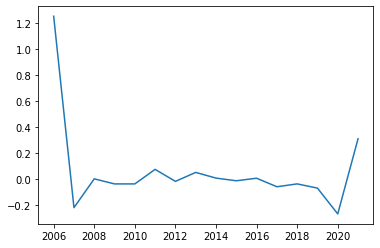

In [140]:
fig, ax = plt.subplots()
residuals = naive[1:] - worldhappy[1:]
ax.plot(residuals.index, residuals)
ax.plot(residuals.index, residuals.rolling(1).std());

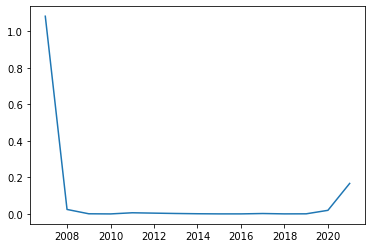

In [150]:
fig, ax = plt.subplots()

ax.plot(residuals.index, residuals.rolling(2).var());

In [153]:
p_val = adfuller(worldhappy.diff()[1:])[1]
print(f"The p-value associated with the Dickey-Fuller statistical test is {p_val},")
if p_val < 0.05:
    print(" so we can safely assume that the differenced data is stationary.")
else:
    print(" so we cannot reject the null hypothesis that the differenced data is \
not stationary.")

The p-value associated with the Dickey-Fuller statistical test is 0.9964957126370785,
 so we cannot reject the null hypothesis that the differenced data is not stationary.


In [159]:
ar_1 = ARIMA(worldhappy, order=(1, 1, 0)).fit()

# We put a typ='levels' to convert our predictions to remove the differencing performed.
ar_1.predict(typ='levels')
ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Life Ladder   No. Observations:                   17
Model:                 ARIMA(1, 1, 0)   Log Likelihood                  -3.420
Date:                Fri, 26 Nov 2021   AIC                             10.839
Time:                        14:23:36   BIC                             12.385
Sample:                             0   HQIC                            10.918
                                 - 17                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8281      0.057    -14.529      0.000      -0.940      -0.716
sigma2         0.0835      0.018      4.517      0.000       0.047       0.120
===================================================================================
Ljung-Box (L1) (Q):                   2.29   Jarque-Bera (JB):                10.82
Prob(Q):                              0.13   Prob(JB):                         0.00
Heteroskedasticity (H):               0.12   Skew:                            -1.71
Prob(H) (two-sided):                  0.03   Kurtosis:                         5.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""